# 📊 **Goodreads Books Data Analysis**
**Author:** Dikshita Aggarwal  
**Tools:** Python, SQLite, Pandas, Seaborn, Matplotlib  
**Dataset Source:** [Kaggle Goodreads Dataset](https://www.kaggle.com/datasets)

---



## ✨ Introduction

Goodreads is one of the world’s largest sites for readers and book recommendations. This project aims to analyze the Goodreads dataset using SQL and Python to uncover insights on book trends, popular authors, user preferences, and more.

This notebook follows the **Data Analysis Lifecycle**:
1. Define the Problem
2. Collect and Prepare Data
3. Explore the Data
4. Analyze using SQL Queries
5. Visualize Results
6. Draw Insights and Conclusions

---


## Import the required Dependencies:
    - Pandas
    - SqlLite3
    - OS
    - SeaBorn
    - Matplotlib
    
  

In [1]:
import pandas as pd
import sqlite3
import os
import seaborn as sns
import matplotlib.pyplot as plt

---


## **STEP 1: DEFINE THE PROBLEM**

The objective of the Analysis is to answer the following questions:

1. **Do highly tagged books get better ratings?**
2. **Do users tend to rate books they mark as "to-read"?**
3. **Which authors have the most high-rated books?**
---

## **STEP 2: COLLECT DATA**

In our case it means, loading the dataset and understanding it better. 

So, we start by defining the location where we have the csv files that we collected from kaggle.

In [2]:
csv_folder_path = 'C:/DataAnalytics/sql-project/data'

# List all CSV files
csv_files = [file for file in os.listdir(csv_folder_path) if file.endswith('.csv')]
csv_files

['books.csv', 'book_tags.csv', 'ratings.csv', 'tags.csv', 'to_read.csv']

Now, we create the tables and load the data into the tables. An additional step that we performed here is to define the `Primary Keys` and `Foreign Keys` Constraints

In [3]:
# Connect to SQLite database
conn = sqlite3.connect("books.db")
cursor = conn.cursor()

# Drop the tables if they already exist
cursor.executescript("""
DROP TABLE IF EXISTS to_read;
DROP TABLE IF EXISTS book_tags;
DROP TABLE IF EXISTS tags;
DROP TABLE IF EXISTS ratings;
DROP TABLE IF EXISTS books;
""")

# Create all tables with foreign keys
cursor.executescript("""
CREATE TABLE books (
    id INTEGER,
    book_id INTEGER PRIMARY KEY,
    best_book_id INTEGER,
    work_id INTEGER,
    books_count INTEGER,
    isbn TEXT,
    isbn13 TEXT,
    authors TEXT,
    original_publication_year DATETIME,
    original_title TEXT,
    title TEXT,
    language_code TEXT,
    average_rating REAL,
    ratings_count INTEGER,
    work_ratings_count INTEGER,
    work_text_reviews_count INTEGER,
    ratings_1 INTEGER,
    ratings_2 INTEGER,
    ratings_3 INTEGER,
    ratings_4 INTEGER,
    ratings_5 INTEGER,
    image_url TEXT,
    small_image_url TEXT
);

CREATE TABLE ratings (
    user_id INTEGER,
    book_id INTEGER,
    rating INTEGER,
    FOREIGN KEY (book_id) REFERENCES books(book_id)
);

CREATE TABLE tags (
    tag_id INTEGER PRIMARY KEY,
    tag_name TEXT
);

CREATE TABLE book_tags (
    goodreads_book_id INTEGER,
    tag_id INTEGER,
    count INTEGER,
    FOREIGN KEY (tag_id) REFERENCES tags(tag_id)
    FOREIGN KEY (goodreads_book_id) REFERENCES books(book_id)
);

CREATE TABLE to_read (
    user_id INTEGER,
    book_id INTEGER,
    FOREIGN KEY (book_id) REFERENCES books(book_id)
);
""")

for file in csv_files:
    table_name = file.replace(".csv", "")
    df = pd.read_csv(os.path.join(csv_folder_path, file))
    df.to_sql(table_name, conn, if_exists='append', index=False)
    print(f"Imported {table_name}")

# Re-enable foreign key constraint checking
cursor.execute("PRAGMA foreign_keys = ON;")
conn.commit()

Imported books
Imported book_tags
Imported ratings
Imported tags
Imported to_read


Verify if all the tables were loaded successfully.

In [4]:
# Running a SQL query to retrieve data for analysis
# Connect to SQLite database (it will create a new database file)
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
tables

,name
0,books
1,ratings
2,tags
3,book_tags
4,to_read


In [5]:
# Preview each table
for table_name in ['books', 'ratings', 'tags', 'book_tags', 'to_read']:
    print(f"\nTable: {table_name}")
    df = pd.read_sql(f'SELECT * FROM {table_name} LIMIT 5;', conn)
    display(df)


Table: books


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,27,1,1,41335427,275,439785960,9780439785970.0,"J.K. Rowling, Mary GrandPré",2005,Harry Potter and the Half-Blood Prince,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,21,2,2,2809203,307,439358078,9780439358070.0,"J.K. Rowling, Mary GrandPré",2003,Harry Potter and the Order of the Phoenix,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
2,2,3,3,4640799,491,439554934,9780439554930.0,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,18,5,5,2402163,376,043965548X,9780439655480.0,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
4,24,6,6,3046572,332,439139600,9780439139600.0,"J.K. Rowling, Mary GrandPré",2000,Harry Potter and the Goblet of Fire,...,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...



Table: ratings


,user_id,book_id,rating
0,314,1,5
1,439,1,3
2,588,1,5
3,1169,1,4
4,1185,1,4



Table: tags


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-



Table: book_tags


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716



Table: to_read


,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


##  Understand the Dataset

- **ratings:** contains ratings by a users for different books as {user_id,book_id,rating} set
- **to_read:** provides IDs of the books marked "to read" by each user, as {user_id,book_id} pairs.
- **books:** has metadata for each book (goodreads IDs, authors, title, average rating, etc.).
- **book_tags:** contains tags/shelves/genres assigned by users to books. Tags in this file are represented by their IDs.
- **tags:** translates tag IDs to names.

**NOTE: goodreads IDs**<br>
Each book may have many editions. goodreads_book_id and best_book_id generally point to the most popular edition of a given book, while goodreads work_id refers to the book in the abstract sense.

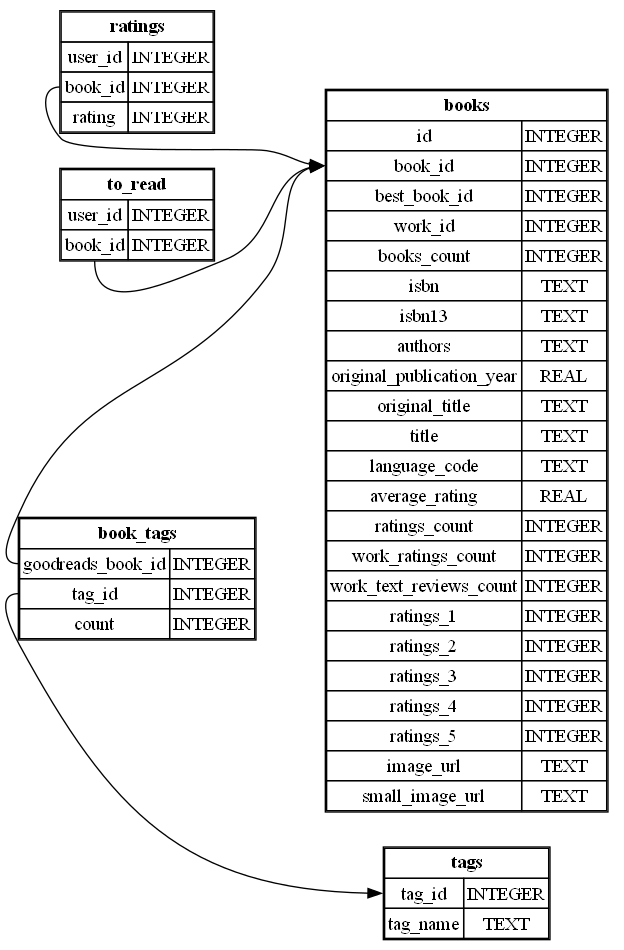

In [6]:
from IPython.display import Image, display

# Display the ER diagram image
display(Image(filename="erd_output.gv.png"))

As visible from the ERD diagram above, the following observations can be established from the datsaset:
- 🧾 **Main Table `books`**: The `books` table is the central entity. Other tables reference it directly or indirectly.
- 📘 `ratings` → `books`
    - **Relationship**: Each rating is given **by a user** on a **book**.
    - **Foreign Key**: `ratings.book_id` → `books.book_id`
    - **Meaning**: A user can rate multiple books, and a book can have multiple ratings (Many-to-Many if users are tracked).
- 📚 `to_read` → `books`
    - **Relationship**: Indicates which books a user intends to read.
    - **Foreign Key**: `to_read.book_id` → `books.book_id`
    - **Meaning**: A user can mark many books to read, and a book can be marked by many users (Many-to-Many).
- 🔖 `book_tags` → `books`
    - **Relationship**: Tags applied to a book using its **Goodreads ID**.
    - **Foreign Key**: `book_tags.goodreads_book_id` → `books.goodreads_book_id`
    - **Meaning**: Tags describe the genre/category of books; this connects metadata from Goodreads to your book.
- 🏷️ `book_tags` → `tags`
    - **Relationship**: Each row in `book_tags` associates a book with a tag.
    - **Foreign Key**: `book_tags.tag_id` → `tags.tag_id`
    - **Meaning**: Enables a Many-to-Many relationship between books and tags.
---


## **STEP 3: CLEAN THE DATA**

To clean the data, we first take an **Overview of the Data:** 

In [7]:
# Get all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Loop through tables and print summary
for table in tables:
    print(f"\nTable: {table}")
    
    # Load data into DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)

    # Shape
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    
    # Null count
    print("\n🚫 Missing Values:")
    print(df.isnull().sum())

    print("-" * 50)


Table: books
Rows: 10000, Columns: 23

🚫 Missing Values:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
--------------------------------------------------

Table: ratings
Rows: 981756, Columns: 3

🚫 Missing Values:
user_id    0
book_id    0
rating    

From the above data, we can understand that the only table with missing values is the books table. 
The following measures can be taken to clean this data:
1. Replace **isbn and isbn1** null values with **"Unknown"**
2. Replace null **original_publication_year** values as well with **Median value for the column**
3. The **original_title** can be replaced with the **title** where it is missing
4. The **language_code** can also be replaced with **Mode value of the column**

In [22]:
# Load data
books_df = pd.read_sql_query("SELECT book_id, isbn, isbn13, original_publication_year, original_title, language_code FROM books", conn)

# Fill missing ISBNs with 'Unknown'
cursor.execute("UPDATE books SET isbn='Unknown' WHERE isbn IS NULL;")
cursor.execute("UPDATE books SET isbn13='Unknown' WHERE isbn13 IS NULL;")

# Fill missing original_publication_year with median
median_year = books_df['original_publication_year'].median()
cursor.execute("UPDATE books SET original_publication_year=? WHERE original_publication_year IS NULL;", (median_year,))

# Fill missing original_title with title
cursor.execute("""
    UPDATE books
    SET original_title = title
    WHERE original_title IS NULL;
""")

# Fill missing language_code with mode
mode_lang = books_df['language_code'].mode()[0]
cursor.execute("UPDATE books SET language_code=? WHERE language_code IS NULL;", (mode_lang,))

# Commit the changes
conn.commit()

# check the table again for null values
print("Check again for missing values:\n")
print(books_df.isnull().sum())

Check again for missing values:

book_id                      0
isbn                         0
isbn13                       0
original_publication_year    0
original_title               0
language_code                0
dtype: int64


---

## **STEP 4: ANALYZING & VISUALIZING THE DATA**

### **Descriptive Analysis**

Descriptive analysis identifies what has already happened. While we moight not be able to draw firm conclusions from any of these insights, summarizing and describing the data will help us to determine how to proceed.

#### &nbsp;&nbsp; 1. What are the top 10 most popular books (by rating count)?

In [23]:
# Running a SQL query to retrieve data for analysis
query = "SELECT title,ratings_count from books ORDER BY ratings_count DESC LIMIT 10;"
tables = pd.read_sql(query, conn)
tables

,title,ratings_count
0,"The Hunger Games (The Hunger Games, #1)",4780653
1,Harry Potter and the Sorcerer's Stone (Harry P...,4602479
2,"Twilight (Twilight, #1)",3866839
3,To Kill a Mockingbird,3198671
4,The Great Gatsby,2683664
5,The Fault in Our Stars,2346404
6,The Hobbit,2071616
7,The Catcher in the Rye,2044241
8,Pride and Prejudice,2035490
9,"Angels & Demons (Robert Langdon, #1)",2001311


#### &nbsp;&nbsp; 2. Which tags are used most often? (Top 10)

In [27]:
# Running a SQL query to retrieve data for analysis
query = """SELECT t.tag_name, count(bt.tag_id) AS tag_count 
        FROM book_tags as bt
        INNER JOIN tags as t 
        ON bt.tag_id = t.tag_id
        GROUP BY t.tag_name
        ORDER BY tag_count DESC
        LIMIT 10"""
tables = pd.read_sql(query, conn)
tables

,tag_name,tag_count
0,to-read,9983
1,favorites,9881
2,owned,9858
3,books-i-own,9799
4,currently-reading,9776
5,library,9415
6,owned-books,9221
7,fiction,9097
8,to-buy,8692
9,kindle,8316


#### &nbsp;&nbsp; 3. What genres (tags) have the highest average ratings? (Top 10)

In [24]:
# Running a SQL query to retrieve data for analysis
query = """SELECT t.tag_name, ROUND(AVG(b.average_rating),2) AS avg_rating
        FROM tags as t 
        INNER JOIN book_tags as bt
        ON bt.tag_id = t.tag_id
        INNER JOIN books b
        ON b.book_id = bt.goodreads_book_id
        GROUP BY t.tag_name
        ORDER BY avg_rating DESC
        LIMIT 10"""
tables = pd.read_sql(query, conn)
tables

,tag_name,avg_rating
0,hobbes,4.78
1,world-shift,4.77
2,stormlight,4.77
3,magic-is-real,4.77
4,imaginative,4.77
5,childhood-classic,4.77
6,boxset,4.77
7,best-books-i-have-ever-read,4.77
8,want-my-own-copy,4.76
9,theology-and-apologetics,4.76


#### &nbsp;&nbsp; 4. What are the most common years of publication?

In [25]:
# Running a SQL query to retrieve data for analysis
query = """SELECT original_publication_year,count(*) as BooksPublishedInYear
            FROM books
            WHERE original_publication_year IS NOT NULL AND original_publication_year > 0
            GROUP BY original_publication_year
            ORDER BY BooksPublishedInYear DESC
            LIMIT 10"""
tables = pd.read_sql(query, conn)
tables

,original_publication_year,BooksPublishedInYear
0,2012,568
1,2011,556
2,2013,518
3,2010,473
4,2014,437
5,2009,432
6,2008,383
7,2007,363
8,2006,362
9,2004,328


### **Diagnostic Analysis**

Diagnostic analytics focuses on understanding why something has happened. It is literally the diagnosis of a problem, just as a doctor uses a patient’s symptoms to diagnose a disease. 

#### &nbsp;&nbsp; 1. Do highly tagged books get better ratings?

In [26]:
# Running a SQL query to retrieve data for analysis
query = """SELECT b.title, COUNT(bt.tag_id) AS tag_count, ROUND(b.average_rating, 2) AS avg_rating,
            CASE 
                WHEN b.average_rating > 4 THEN 'High Ratings'
                WHEN b.average_rating > 3 THEN 'Average Ratings'
                ELSE 'Low Rating'
            END AS rating_category
        FROM books AS b
        JOIN book_tags AS bt ON b.book_id = bt.goodreads_book_id
        GROUP BY b.book_id
        ORDER BY tag_count DESC;"""
tables = pd.read_sql(query, conn)
tables.head()

,title,tag_count,avg_rating,rating_category
0,Wait for It,100,4.22,High Ratings
1,Egomaniac,100,4.34,High Ratings
2,The Hate U Give,100,4.62,High Ratings
3,Love Warrior,100,4.10,High Ratings
4,Hogwarts: An Incomplete and Unreliable Guide (...,100,4.21,High Ratings


We can try plotting this and see what impact it holds:

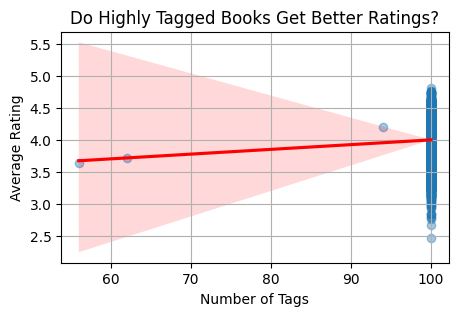

In [14]:
plt.figure(figsize=(5, 3))
sns.regplot(data=tables, x='tag_count', y='avg_rating', scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.title('Do Highly Tagged Books Get Better Ratings?')
plt.xlabel('Number of Tags')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

From the above graph, we can see that the tag_count is clustered at 100 and most data points fall in a vertical line around tag_count = 100. As a result the analysis is not meaningful. \
Rather, we can ask the question : **Do books that are tagged a lot tend to be rated higher?**

In [28]:
# Running a SQL query to retrieve data for analysis
query = """SELECT b.title, COUNT(bt.tag_id) AS tag_count, ROUND(b.average_rating, 2) AS avg_rating,
            CASE 
                WHEN b.average_rating > 4 THEN 'High Ratings'
                WHEN b.average_rating > 3 THEN 'Average Ratings'
                ELSE 'Low Rating'
            END AS rating_category
        FROM books AS b
        JOIN book_tags AS bt ON b.book_id = bt.goodreads_book_id
        GROUP BY b.title, b.average_rating
        ORDER BY tag_count DESC;"""
tables = pd.read_sql(query, conn)
tables.head()

,title,tag_count,avg_rating,rating_category
0,Anatomy for the Artist,200,3.97,Average Ratings
1,"Angels (Walsh Family, #3)",100,3.73,Average Ratings
2,"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",100,3.57,Average Ratings
3,#GIRLBOSS,100,3.71,Average Ratings
4,'Salem's Lot,100,3.99,Average Ratings


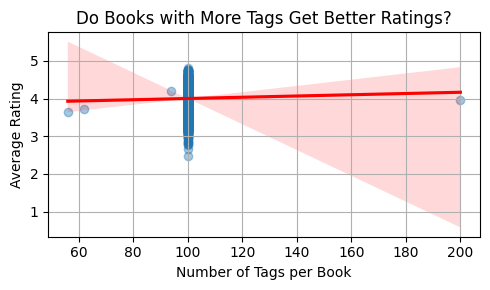

In [29]:
plt.figure(figsize=(5, 3))
sns.regplot(data=tables, x="tag_count", y="avg_rating", scatter_kws={'alpha':0.4}, line_kws={"color":"red"})
plt.title("Do Books with More Tags Get Better Ratings?")
plt.xlabel("Number of Tags per Book")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion:** We see a little variation but still can't say as most books have the same tag count, which weakens the strength of any conclusions.

#### &nbsp;&nbsp; 2. Do users tend to rate books they mark as "to-read"?

In [30]:
# Running a SQL query to retrieve data for analysis
query = """SELECT Count(*)
        FROM ratings AS r
        JOIN to_read AS tr ON r.user_id = tr.user_id AND r.book_id = tr.book_id;"""
tables = pd.read_sql(query, conn)
tables

,Count(*)
0,258


In [31]:
# Running a SQL query to retrieve data for analysis
query = """SELECT Count(*)
        FROM ratings;"""
tables = pd.read_sql(query, conn)
tables

,Count(*)
0,981756


In [32]:
# Running a SQL query to retrieve data for analysis
query = """SELECT Count(*)
        FROM to_read;"""
tables = pd.read_sql(query, conn)
tables

,Count(*)
0,912705


The data indicates that *just a small percentage (~0.028%) of all the books that were tagged as "to-read" were subsequently rated by the same users*. This suggests that the majority of users either read and rate books without specifically using the "to-read" feature, or they mark them as "to-read" and never return to rate them.
Therefore, it is reasonable to assume that **users do not typically assign a rating to the books they designate as "to-read."**

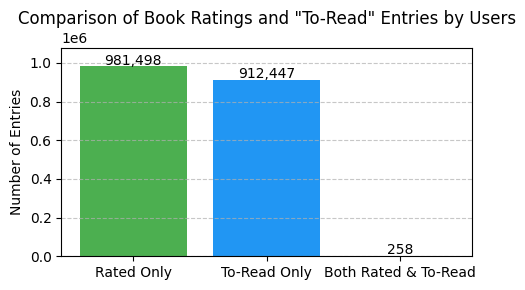

In [33]:
rated_only = 981756 - 258
to_read_only = 912705 - 258
both_rated_and_to_read = 258

# Prepare data for Venn-style bar chart
labels = ['Rated Only', 'To-Read Only', 'Both Rated & To-Read']
values = [rated_only, to_read_only, both_rated_and_to_read]
colors = ['#4caf50', '#2196f3', '#f44336']

# Plotting
plt.figure(figsize=(5, 3))
bars = plt.bar(labels, values, color=colors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 10000, f'{yval:,}', ha='center', fontsize=10)

# Title and labels
plt.title('Comparison of Book Ratings and "To-Read" Entries by Users')
plt.ylabel('Number of Entries')
plt.ylim(0, max(values) * 1.1)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The above graph depicts that:
1. The **majority of books** were simply listed as **"to-read" or rated.**
2. Books that users have **both tagged as "to-read" and subsequently rated** make up a **very small percentage (258 items)** of both categories.

It's very clear from this: Very rarely do users rate the books they designate as "to-read."

#### &nbsp;&nbsp; 3. Which authors have the most high-rated books? (Top 10)

Let's assume that a book is highly rated if it's average rating is 4.5 or above.

In [34]:
# Running a SQL query to retrieve data for analysis
query = """SELECT authors, SUM(ratings_count) as Total_Ratings
        FROM books
        WHERE average_rating >= '4.5'
        GROUP BY authors
        ORDER BY Total_Ratings DESC
        LIMIT 10;"""
tables = pd.read_sql(query, conn)
tables

,authors,Total_Ratings
0,"J.K. Rowling, Mary GrandPré",5255589
1,"J.K. Rowling, Mary GrandPré, Rufus Beck",1832823
2,Patrick Rothfuss,645787
3,George R.R. Martin,595479
4,Rick Riordan,589770
5,J.R.R. Tolkien,554866
6,Sarah J. Maas,449653
7,Bill Watterson,313095
8,Kristin Hannah,253606
9,Brandon Sanderson,251103


---

## 🧾 **Summary & Conclusion**
This analysis highlighted several interesting insights from the Goodreads books dataset:<br><br>
- 📈 **Highly tagged books** are **not** that **highly rated**.<br>
- 🏆 Users **hardly rate** the books they designate as **to-read**.<br>
- ✍️ The **most highly rated author** is **J.K. Rowling, Mary GrandPré**. <br>
- 📅 The **majority of books** in this dataset were **published in the year 2012**.<br><br>
While the data is rich, improvements could be made by cleaning inconsistent genre/tag naming and exploring more features such as author popularity or series info.<br><br>


## ✅ Final Summary and Key Takeaways

Throughout this analysis of the **Goodreads dataset**, we explored various insights such as:

- 📚 **Most Popular Book Tags** and what genres readers love the most.
- ✍️ **Authors with the Most Ratings** to identify popular contributors.
- 🌟 **Distribution of Ratings** to understand how readers perceive books on the platform.
- 📈 **Relationships** between number of ratings, average rating, and number of reviews.

### 🎯 Recommendations

- **For Publishers**: Focus on genres with high engagement and rating counts.
- **For Authors**: Consider writing in popular tags to improve discoverability.
- **For Goodreads**: Improve features around highly-rated but less-discovered books to boost engagement.

---

> 🚀 This project demonstrates how data analysis using SQL and Python can uncover trends in online reading behavior and guide strategic decisions.
